In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [48]:
fuel = pd.read_csv("fuel.csv")
fuel.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [36]:
unique_transmissions = fuel['TRANSMISSION'].unique()
print(unique_transmissions)

['A4' 'M5' 'AS5' 'AS4' 'M6' 'A5' 'A3' 'AS6' 'AV' 'A6' 'AM6' 'A7' 'AM7'
 'AS7' 'AS8' 'M4' 'A8' 'M7' 'AV7' 'AV8' 'AV6' 'AM5' 'A9' 'AS9' 'AM8' 'AM9'
 'AS10' 'A10' 'AV10' 'AV1']


In [37]:
unique_cylinders = fuel['CYLINDERS'].unique()
print(unique_cylinders)

[ 4  6  8 12  3 10  5  2 16]


In [38]:
unique_fuel = fuel['FUEL'].unique()
print(unique_fuel)

['X' 'Z' 'E' 'N' 'D']


In [74]:
if fuel['FUEL'].dtype == 'object':
    fuel['FUEL'] = fuel['FUEL'].map({
        'X': 0, 'Z': 1, 'E': 2, 'N': 3, 'D': 4
    })

fuel['FUEL'] = fuel['FUEL'].fillna(-1)
print(fuel['FUEL'].unique()) 


[0 1 2 3 4]


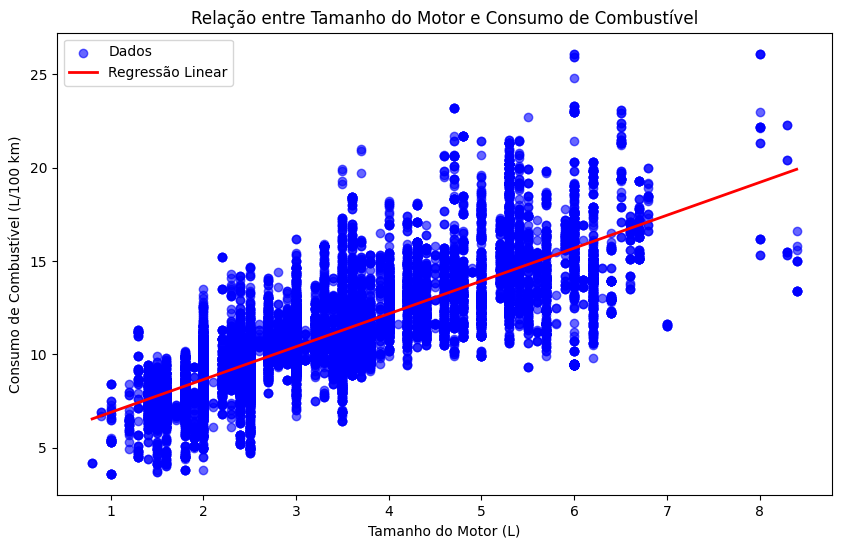

In [76]:
X = fuel[["ENGINE SIZE"]].values 
y = fuel["COMB (L/100 km)"].values 

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) 
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação entre Tamanho do Motor e Consumo de Combustível')
plt.xlabel('Tamanho do Motor (L)')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()

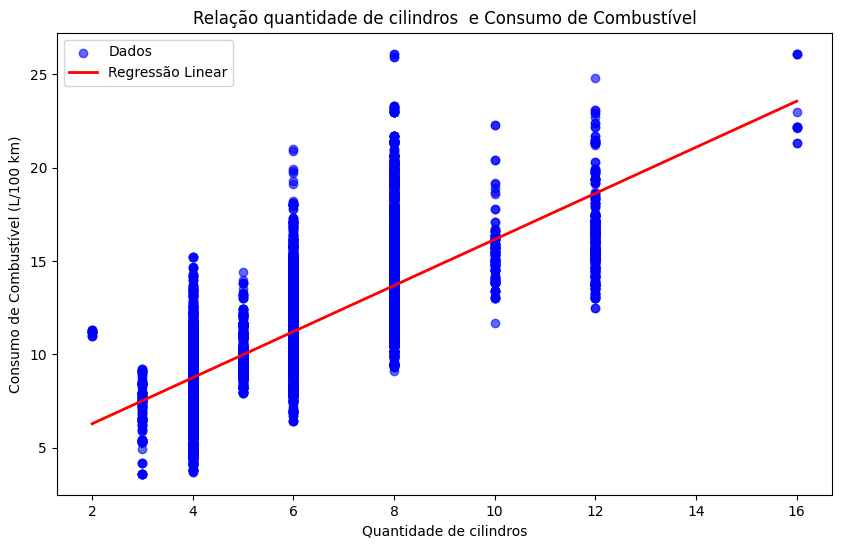

In [27]:
df = pd.read_csv('fuel.csv')

X = df[["CYLINDERS"]].values  
y = df["COMB (L/100 km)"].values  

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação quantidade de cilindros  e Consumo de Combustível')
plt.xlabel('Quantidade de cilindros')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()


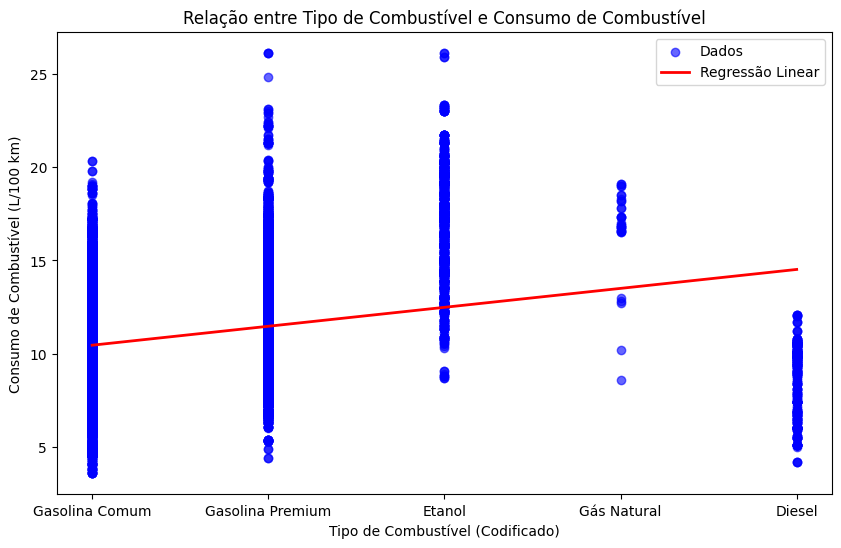

In [80]:
df = pd.read_csv("fuel.csv", encoding="utf-8")

df['FUEL'] = df['FUEL'].map({
    'X': 0, 'Z': 1, 'E': 2, 'N': 3, 'D': 4
})

df['FUEL'] = df['FUEL'].fillna(-1)

X = df[["FUEL"]].values  
y = df["COMB (L/100 km)"].values 

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))

plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação entre Tipo de Combustível e Consumo de Combustível')
plt.xlabel('Tipo de Combustível (Codificado)')
plt.ylabel('Consumo de Combustível (L/100 km)')

plt.xticks(ticks=np.arange(5), labels=['Gasolina Comum', 'Gasolina Premium', 'Etanol', 'Gás Natural', 'Diesel'])

plt.legend()

plt.show()

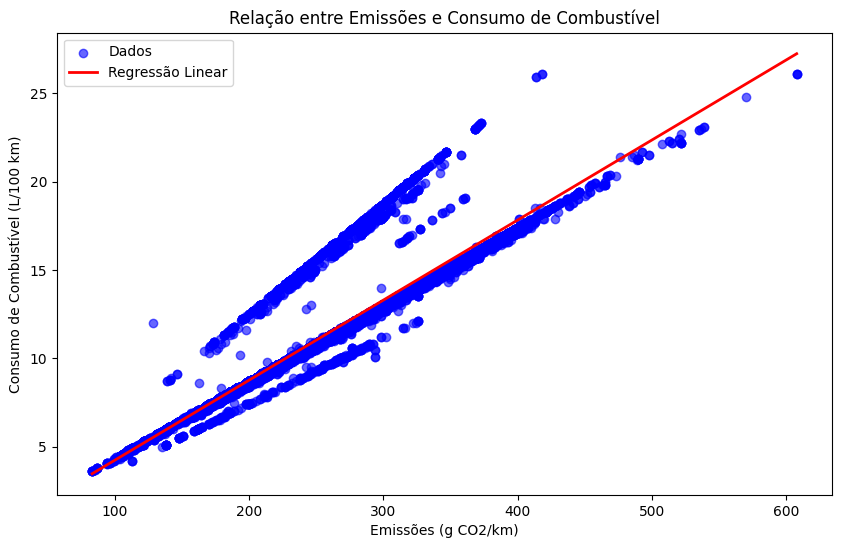

In [29]:
X = fuel[["EMISSIONS"]].values  
y = fuel["COMB (L/100 km)"].values  

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação entre Emissões e Consumo de Combustível')
plt.xlabel('Emissões (g CO2/km)')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()

In [86]:

param_grid_rf = {
    'modelo__n_estimators': [50, 100, 150],
    'modelo__max_depth': [None, 10, 20, 30],
    'modelo__min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'modelo__n_estimators': [50, 100, 150],
    'modelo__learning_rate': [0.01, 0.1, 0.2],
    'modelo__max_depth': [3, 5, 7]
}


grid_search_rf = GridSearchCV(estimator=pipelines['Random Forest'], param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

grid_search_gb = GridSearchCV(estimator=pipelines['Gradient Boosting'], param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=1)

print("Ajustando Random Forest...")
grid_search_rf.fit(X_train, y_train)

print("Ajustando Gradient Boosting...")
grid_search_gb.fit(X_train, y_train)

print("\nMelhores parâmetros para Random Forest:")
print(grid_search_rf.best_params_)
print(f"Melhor pontuação: {grid_search_rf.best_score_}")

print("\nMelhores parâmetros para Gradient Boosting:")
print(grid_search_gb.best_params_)
print(f"Melhor pontuação: {grid_search_gb.best_score_}")


Ajustando Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Ajustando Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros para Random Forest:
{'modelo__max_depth': 30, 'modelo__min_samples_split': 2, 'modelo__n_estimators': 150}
Melhor pontuação: 0.8769804094971809

Melhores parâmetros para Gradient Boosting:
{'modelo__learning_rate': 0.2, 'modelo__max_depth': 7, 'modelo__n_estimators': 150}
Melhor pontuação: 0.8772354879341056


Valores únicos em TRANSMISSION: [ 1 16  9  8 17  2  0 10 24  3 20  4 21 11 12 15  5 18 27 28 26 19  6 13
 22 23 14  7 29 25]


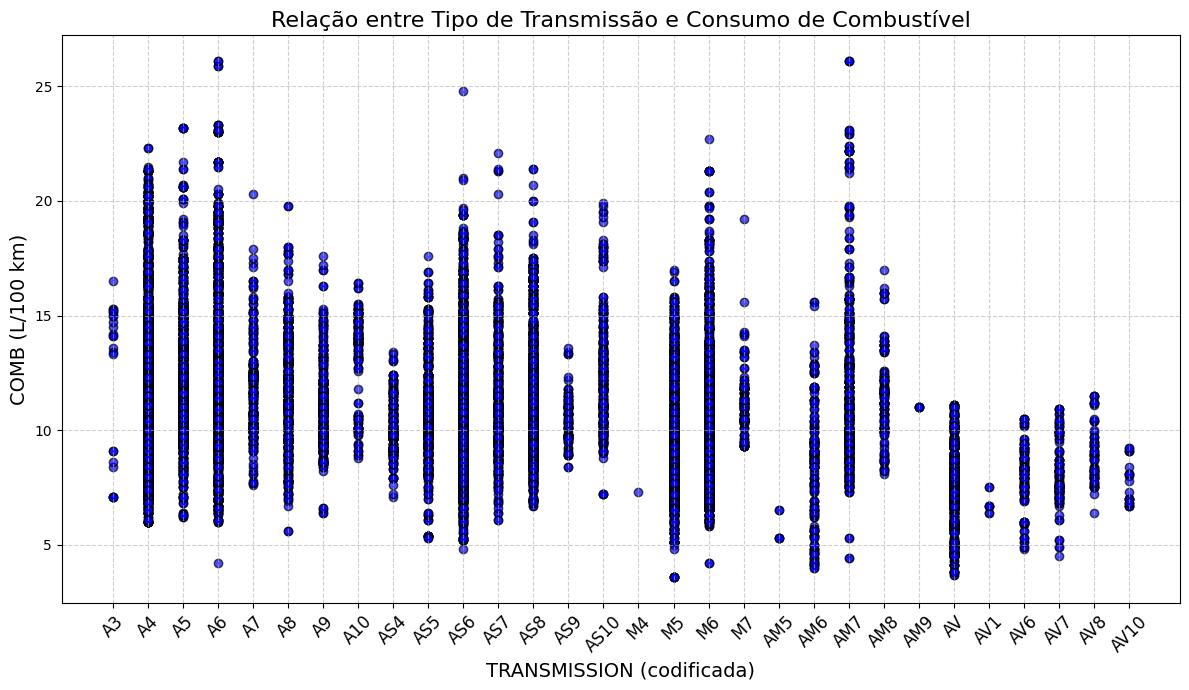

In [31]:
transmission_mapping = {
    'A3': 0, 'A4': 1, 'A5': 2, 'A6': 3, 'A7': 4, 'A8': 5, 'A9': 6, 'A10': 7,
    'AS4': 8, 'AS5': 9, 'AS6': 10, 'AS7': 11, 'AS8': 12, 'AS9': 13, 'AS10': 14,
    'M4': 15, 'M5': 16, 'M6': 17, 'M7': 18, 'AM5': 19, 'AM6': 20, 'AM7': 21,
    'AM8': 22, 'AM9': 23, 'AV': 24, 'AV1': 25, 'AV6': 26, 'AV7': 27, 'AV8': 28, 'AV10': 29
}

if not fuel['TRANSMISSION'].apply(lambda x: isinstance(x, int)).all():
    fuel['TRANSMISSION'] = fuel['TRANSMISSION'].map(transmission_mapping).fillna(-1)

fuel['TRANSMISSION'] = fuel['TRANSMISSION'].astype(int)

valores_unicos = fuel['TRANSMISSION'].unique()
print("Valores únicos em TRANSMISSION:", valores_unicos)

plt.figure(figsize=(12, 7))
plt.scatter(fuel['TRANSMISSION'], fuel['COMB (L/100 km)'], alpha=0.7, color='blue', edgecolor='black')
plt.title('Relação entre Tipo de Transmissão e Consumo de Combustível', fontsize=16)
plt.xlabel('TRANSMISSION (codificada)', fontsize=14)
plt.ylabel('COMB (L/100 km)', fontsize=14)
plt.xticks(ticks=range(len(transmission_mapping)), labels=transmission_mapping.keys(), rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

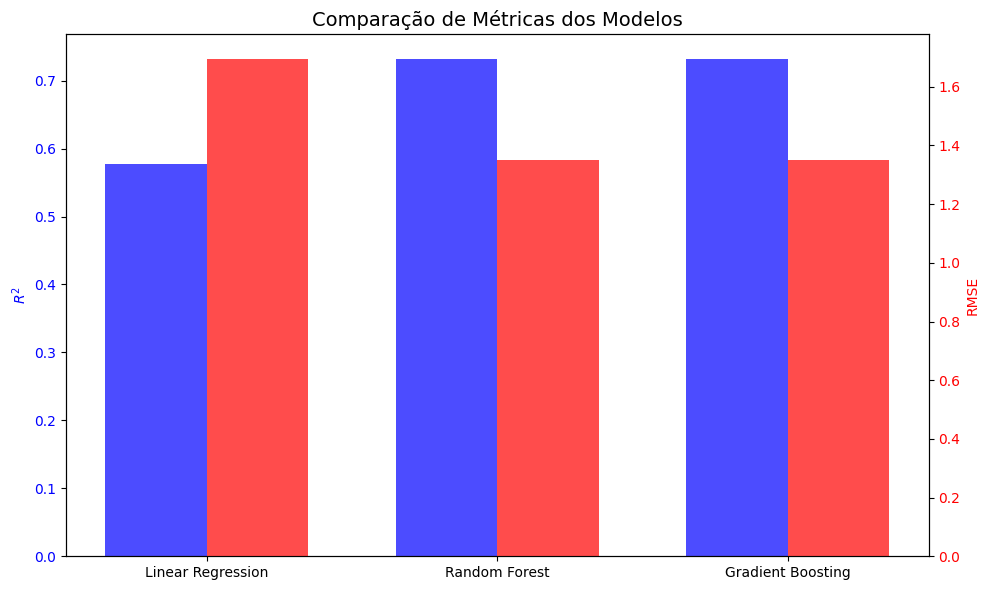

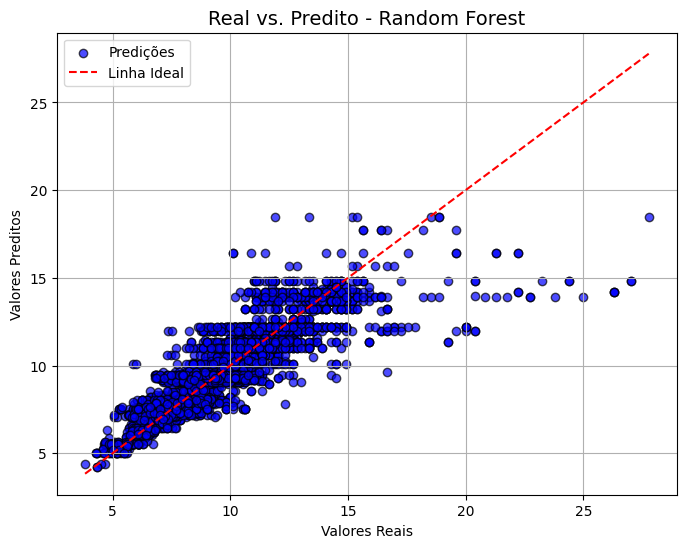

In [88]:
df = pd.read_csv('fuel.csv')

df['ENGINE SIZE'] = pd.to_numeric(df['ENGINE SIZE'], errors='coerce')
df['CYLINDERS'] = pd.to_numeric(df['CYLINDERS'], errors='coerce')
df['FUEL'] = df['FUEL'].map({'X': 0, 'Z': 1, 'E': 2, 'N': 3, 'D': 4})
df.dropna(subset=['ENGINE SIZE', 'CYLINDERS', 'FUEL', 'COMB (L/100 km)'], inplace=True)

y = 100 / df['COMB (L/100 km)']
X = df[['ENGINE SIZE', 'CYLINDERS', 'FUEL']]

preprocessador = ColumnTransformer(
    transformers=[('num', Pipeline([('scaler', StandardScaler()), ('passthrough', 'passthrough')]),
                   ['ENGINE SIZE', 'CYLINDERS']),
                  ('cat', 'passthrough', ['FUEL'])]
)

modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=150, min_samples_split=2, max_depth=30, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, max_depth=7, learning_rate=0.2, random_state=42)
}

pipelines = {
    nome: Pipeline(steps=[('preprocessador', preprocessador), ('modelo', modelo)])
    for nome, modelo in modelos.items()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

melhor_modelo_nome = None
melhor_modelo_pipeline = None
melhor_r2 = float('-inf')
metricas = {}

for nome, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    metricas[nome] = {'R²': r2, 'RMSE': rmse}
    if r2 > melhor_r2:
        melhor_r2 = r2
        melhor_modelo_nome = nome
        melhor_modelo_pipeline = pipeline

joblib.dump(melhor_modelo_pipeline, 'modelos.pkl')

def plot_metricas(metricas):
    modelos = list(metricas.keys())
    r2_scores = [metricas[modelo]['R²'] for modelo in modelos]
    rmse_scores = [metricas[modelo]['RMSE'] for modelo in modelos]

    x = np.arange(len(modelos))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(x - width/2, r2_scores, width, label='$R^2$', color='blue', alpha=0.7)
    ax1.set_ylabel('$R^2$', color='blue')
    ax1.set_title('Comparação de Métricas dos Modelos', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(modelos)
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.bar(x + width/2, rmse_scores, width, label='RMSE', color='red', alpha=0.7)
    ax2.set_ylabel('RMSE', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    fig.tight_layout()
    plt.show()

def plot_real_vs_predito(melhor_modelo_pipeline, X_test, y_test):
    y_pred = melhor_modelo_pipeline.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k', label='Predições')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Linha Ideal')
    plt.title(f'Real vs. Predito - {melhor_modelo_nome}', fontsize=14)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metricas(metricas)
plot_real_vs_predito(melhor_modelo_pipeline, X_test, y_test)
